In [31]:
from __future__ import print_function

import numpy as np
from scipy import stats
import pylab as pl

import os
import json
import pandas as pd

import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

import matplotlib
import matplotlib.pyplot as pl

%matplotlib nbagg

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['box']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [32]:
# get MTA rides data from fb55 repo

In [33]:
# !wget "https://github.com/fedhere/PUI2017_fb55/raw/master/HW10_fb55/MTA_Fare.npy" # get data

In [34]:
mtaRides = np.load("MTA_Fare.npy")

In [35]:
mtaRides.shape

(600, 23, 194)

In [36]:
mtaRides.flatten().shape

(2677200,)

In [37]:
mtaRides.reshape(13800, 194).shape

(13800, 194)

In [38]:
mtaFlat = mtaRides.flatten().shape

In [39]:
mtaRides_St = mtaRides.reshape(13800, 194).shape

In [40]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [42]:
np.nanmean(mtaRides)

2157.8262034961899

In [43]:
np.nansum(mtaRides)

5776932312

In [44]:
mta_allsum = np.nansum(mtaRides, axis=0)
print (mta_allsum.shape)


(23, 194)


In [45]:
mta_allsum = np.nansum(mtaRides, axis=1)
print (mta_allsum.shape)

(600, 194)


In [46]:
# code from and reviewed from Github repo sbg389 

In [47]:
print (mtaRides.shape)

# data cleanup convert to float, replace -1 with NaN

mtaRides = mtaRides.astype(numpy.float, copy = False)
mtaRides[mtaRides == -1] = np.nan

# Create an array with the rede type
ridetype = ['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud']

# Create a date range for the weeks
rng = pd.date_range('5/21/2010', periods=194, freq='W')

(600, 23, 194)


In [48]:
print ("nanmean of mtarides: " + str (np.nanmean(mtaRides)))
print ("regular mean of mtarides: " + str (np.mean(mtaRides)))

nanmean of mtarides: 2849.41627865
regular mean of mtarides: nan


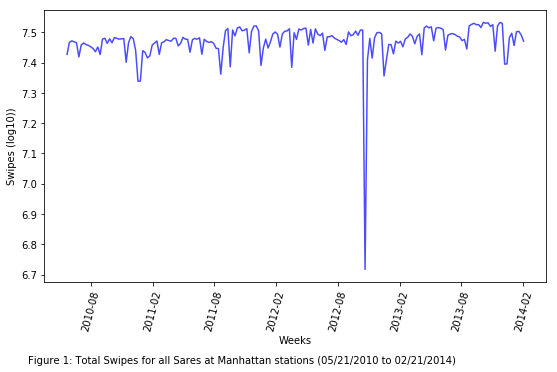

In [51]:
# Sum timeseries of all stations and fares (looking for event common to all time series)

mtaRides_allStations = np.nansum(mtaRides, axis = 0) # print (mtarides_allStations.shape)

mtaRides_allStationsAndFares = np.nansum(mtaRides_allStations, axis = 0) # print (mtarides_allStationsAndFares.shape)

pl.figure(figsize=(9, 5))
pl.xlabel("Weeks")
pl.ylabel("Swipes (log10))") 

# Plot sum of all rides (use log10 on the y axis to improve visibility)
pl.plot(rng, np.log10(mtaRides_allStationsAndFares),'b', alpha=0.7)
pl.xticks(rotation='75')
pl.legend(loc='upper left')

figtext(0.1,-.1,"Figure 1: Total Swipes for all Sares at Manhattan stations (05/21/2010 to 02/21/2014)")

In [52]:
# Ident the event using mean and standard deviation 
# find points that deviate from the mean by more than 3 standard deviations
# code from https://github.com/fedhere/UInotebooks/blob/master/timeseries/FDNYdeaths.ipynb

print ("mean swipes by week {:.2f}".format(np.nanmean(mtaRides_allStationsAndFares)))
print ("stdev swipes by week {:.2f}".format(np.nanstd(mtaRides_allStationsAndFares)))

thresholds = [np.nanmean(mtaRides_allStationsAndFares) + 3 * np.nanstd(mtaRides_allStationsAndFares), 
              np.nanmean(mtaRides_allStationsAndFares) - 3 * np.nanstd(mtaRides_allStationsAndFares)]

print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))
print ("earliest datapoint", min(rng))

mean swipes by week 29781349.87
stdev swipes by week 2983960.42
3-sigma thresholds 38733231.14 20829468.61
earliest datapoint 2010-05-23 00:00:00


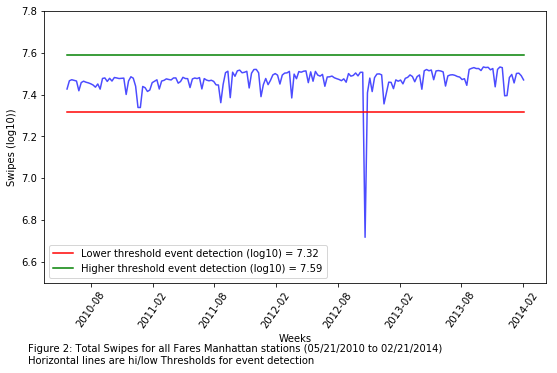

In [55]:
pl.figure(figsize=(9, 5))
pl.xlabel("Weeks")
pl.ylabel("Swipes (log10))") 
pl.ylim(6.5,7.8)

# Plot sum of all rides (using log10 on the y axis to improve visibility)
pl.plot(rng, np.log10(mtaRides_allStationsAndFares),'b', alpha=0.7)
pl.xticks(rotation='55')

# Plot the lower thereshold for the event detection
pl.plot((min(rng), max(rng)),(np.log10(thresholds[1]),np.log10(thresholds[1])), color='r',
       label='Lower threshold event detection (log10) = %.2f' % np.log10(thresholds[1]))

# Plot the higher Thereshold for the event detection
pl.plot((min(rng), max(rng)),(np.log10(thresholds[0]),np.log10(thresholds[0])), color='g',
        label='Higher threshold event detection (log10) = %.2f' % np.log10(thresholds[0]))

figtext(0.1,-.1,"Figure 2: Total Swipes for all Fares Manhattan stations (05/21/2010 to 02/21/2014) \n"
 "Horizontal lines are hi/low Thresholds for event detection")
pl.legend(loc='lower left')

In [56]:
# Get date for event and explain it is
print (rng[np.where(mtaRides_allStationsAndFares < 20829468.61)])

DatetimeIndex(['2012-10-21'], dtype='datetime64[ns]', freq=None)


# Event Super Storm Sandy
# http://theweek.com/articles/470966/10-things-need-know-today-october-28-2012

In [69]:
# Sum time series of all stations evaluate time series of each type of fares

mtaRides_allStations = np.nansum(mtaRides, axis = 0)


In [70]:
print ((np.min(mtaRides_allStations[n]))>0)

False


In [71]:
print (mtaRides_allStations.shape)


(23, 194)


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:35: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


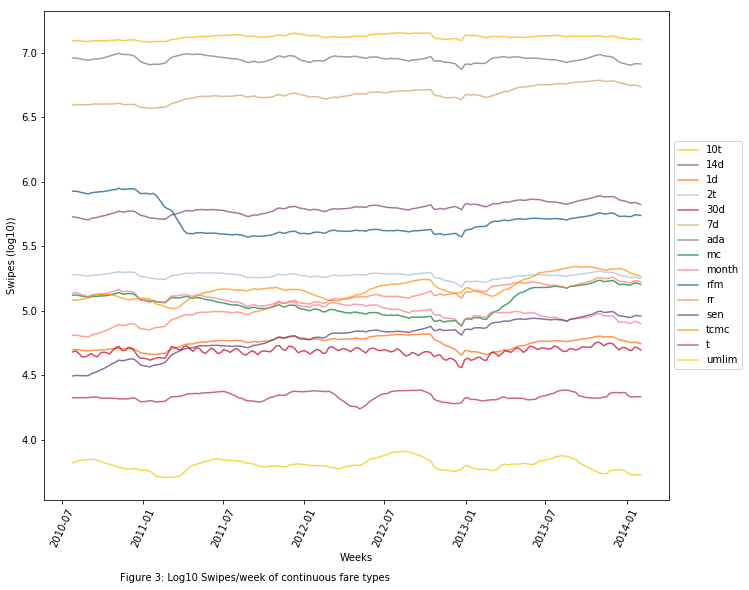

In [72]:
# explore the data #print (np.nanmin(np.log10(pd.stats.moments.rolling_mean(mtarides_allStations[0], 10))))

# Color sequence from FBB stationary notebook sample
# https://github.com/fedhere/UInotebooks/blob/master/timeseries/stationarity.ipynb
# Will create a function to plot iterating through the color sequence for the different fares

kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    # The following don't work well for people with defective color vision
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

seqlen = len(kelly_colors_hex)

def plot_rtype(range, rtype, color):
    '''Function to plot the time series cycling through color sequence'''
    pl.plot(range, np.log10(pd.stats.moments.rolling_mean(mtaRides_allStations[rtype], 10)), color=color, 
           alpha = .7, label = ridetype[rtype])
    
pl.figure(figsize=(14, 9))
pl.xlabel("Weeks")
pl.ylabel("Swipes (log10))") 
ax = plt.subplot(111)
    
curr_col = 0

# dictionary to store the begining and end of time series, key is code for fare type, values a tuple
# With the position on the original array and the ration value
# ex {'2t': (3, 0.933803359955935)}

fareSeriesRatios = {}

for n in range(0,len(mtaRides_allStations)):
    
    # Check the time series is continuous (no weeks with 0 rides)
    # criteria to rule out upfront things that wont steady increase or decrease
    
    if ((np.min(mtaRides_allStations[n])) > 0):
        
    # Plot sum all rides (using log10 on the y axis to improve visibility)
        #if ((np.nanmin(np.log10(pd.stats.moments.rolling_mean(mtarides_allStations[n], 10))) > 4) &
        #((np.nanmax(np.log10(pd.stats.moments.rolling_mean(mtarides_allStations[n], 10))) < 6))):
        #pl.plot(rng, np.log10(pd.stats.moments.rolling_mean(mtarides_allStations[n], 10)),
        #alpha=0.7, )
        
        plot_rtype(rng, n, kelly_colors_hex[curr_col])
        curr_col = (curr_col + 1)%seqlen
    
        # Sum the rides for the begining (first ten weeks)
        # and the end of the series (last ten weeks)
        
        begningSeries = mtaRides_allStations[n,:10].sum()
        endSeries = mtaRides_allStations[n,-10:].sum()
        seriesRatio = endSeries/begningSeries
        fareSeriesRatios[ridetype[n]] = (n,seriesRatio)

pl.xticks(rotation='65')

# Shrink current axis by 20%
# So I can put a legend to the right of the current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

figtext(0.2,-.00001,"Figure 3: Log10 Swipes/week of continuous fare types")

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:20: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


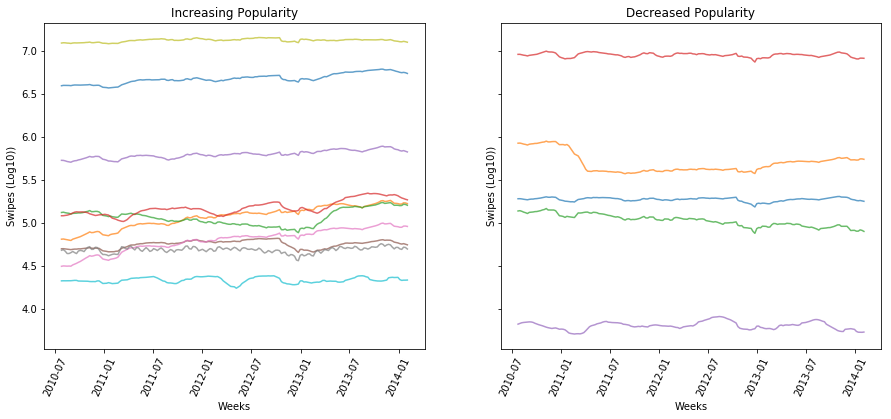

Figure 4: Log10 Swipes/week fares w/Increasing & Decreasing popularity


In [64]:
# If ridership type increased, the ratio will be > 1 (more rides than initial)
# if decreased <1

f, (ax1, ax2) = pl.subplots(1, 2, sharey=True, figsize=(15,6))

for ax in f.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation='65')
    pl.xlabel("Weeks")
    pl.ylabel("Swipes (Log10))") 
      
ax1.set_title('Increasing Popularity')
ax2.set_title('Decreased Popularity')

for key, value in fareSeriesRatios.iteritems():
    if (fareSeriesRatios[key][1] > 1):
        ax1.plot(rng, np.log10(pd.stats.moments.rolling_mean(mtaRides_allStations[fareSeriesRatios[key][0]], 10)), 
                 alpha = .7, label = key)
    else:
        ax2.plot(rng, np.log10(pd.stats.moments.rolling_mean(mtaRides_allStations[fareSeriesRatios[key][0]], 10)), 
                 alpha = .7, label = key)

pl.show()


print ("Figure 4: Log10 Swipes/week fares w/Increasing & Decreasing popularity")

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:21: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


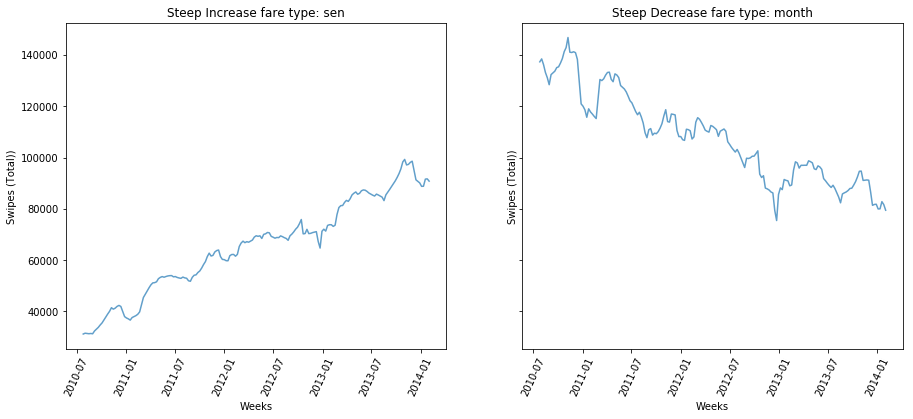

Figure 5: Total Swipes/week for the steep increase/decrease fares

The fare type w/steep upward trend is sen, fare went from average 
of 31208.6 swipes /week during the first 10 weeks to average of 90798.2 the last 10 weeks


fare type with the steep downard trend is month, fare went from average 
of 137296.4 swipes /week during the first 10 weeks to an average 79456.5 the last 10 weeks


In [65]:
# Getting min and max values from the fareSeriesRations dict
# represent fares with steep up/down trends
# Get max/min from a dic stack overflow (http://stackoverflow.com/a/3282871)

downFare =  min(fareSeriesRatios.items(), key=lambda x: x[1][1])
upFare =  max(fareSeriesRatios.items(), key=lambda x: x[1][1])

# plot side by side w/absolut values (not log10) w/rolling mean 10 weeks

f, (ax1, ax2) = pl.subplots(1, 2, sharey=True,figsize=(15,6))

for ax in f.axes:
    matplotlib.pyplot.sca(ax)
    pl.xticks(rotation='65')
    pl.xlabel("Weeks")
    pl.ylabel("Swipes (Total))") 

ax1.set_title('Steep Increase fare type: ' + upFare[0])
ax2.set_title('Steep Decrease fare type: ' + downFare[0])

ax1.plot(rng, pd.stats.moments.rolling_mean(mtaRides_allStations[fareSeriesRatios['sen'][0]],10)
         , alpha = .7, label = 'sen')

ax2.plot(rng, pd.stats.moments.rolling_mean(mtaRides_allStations[fareSeriesRatios['month'][0]],10)
        , alpha = .7, label = 'month')

pl.show()

print ("Figure 5: Total Swipes/week for the steep increase/decrease fares" + '\n')

print ("The fare type w/steep upward trend is " + upFare[0] + ", fare went from average " +
       '\n' + "of " + str(np.average(mtaRides_allStations[ridetype.index(upFare[0])][:10])) + " swipes " +
       "/week during the first 10 weeks to average of " 
       + str(np.average(mtaRides_allStations[ridetype.index(upFare[0])][-10:])) + " the last 10 weeks")

print ('\n')

print ("fare type with the steep downard trend is " + downFare[0] + ", fare went from average " +
       '\n' + "of " + str(np.average(mtaRides_allStations[ridetype.index(downFare[0])][:10])) + " swipes " +
       "/week during the first 10 weeks to an average " 
       + str(np.average(mtaRides_allStations[ridetype.index(downFare[0])][-10:])) + " the last 10 weeks")

In [ ]:
#3 Trend Analysis

NameError: name 'mtaRides_allStations_power' is not defined

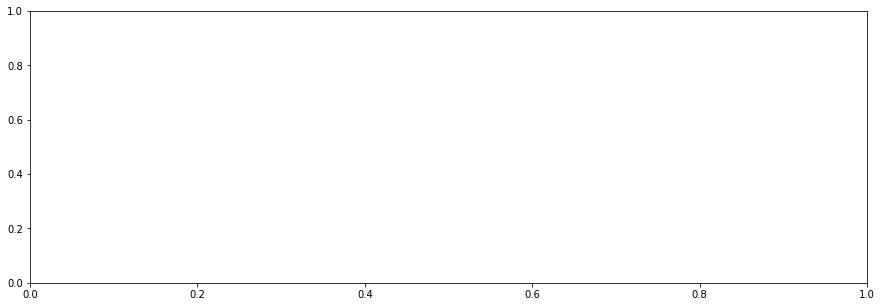

In [66]:
# Collapse the fare types dimension of the cube for stations
mtaRides_allStations = np.nansum(mtaRides, axis=1)

# visually inspect the stations plot power spectrum, excluding the first two elements on the X
# (frequencies that correspond infinity and the whole period: "Uninteresting")
# explained in https://github.com/fedhere/UInotebooks/blob/master/timeseries/fourier.ipynb

N = len(mtaRides_allStations[1])
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)

# create a dictionary to store the frequency bin centers in cycles per week (X Axis) and the Fourier Transform value (Y) for eac of the stations

mtaRides_allStations_yearPeriodicity = {}

for i in range (len(mtaRides_allStations)):
    f = np.abs(np.fft.rfft(mtaRides_allStations[i]))
    ffreq = np.fft.rfftfreq(N, 1.0)
    mtaRides_allStations_power[i]=(ffreq,f)
    ax.plot(ffreq[2:], (f[2:]), '-')
    mtaRides_allStations_yearPeriodicity[i]=((f[4]))

ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("Period (Weeks)", fontsize=15)
pl.ylabel("Power", fontsize=15)

ax.set_title('Power Spectrum for all 600 Subway stations in Manhattan', fontsize=20)

In [73]:
# Explore the frequency bins

print ("Center of the bin 3: " + str(1 / ffreq [3]) + ' Weeks')
print ("Center of the bin 4: " + str(1 / ffreq [4]) + ' Weeks')
print ("Center of the bin 5: " + str(1 / ffreq [5]) + ' Weeks')

Center of the bin 3: 64.6666666667 Weeks
Center of the bin 4: 48.5 Weeks
Center of the bin 5: 38.8 Weeks


In [74]:
# stations w/higher values for bin
# collections.counter, code from http://stackoverflow.com/questions/11902665/top-values-from-dictionary

d = collections.Counter(mtarides_allStations_yearPeriodicity)
most_yearly_periodic_stations = []

for k, v in d.most_common(4):
    most_yearly_periodic_stations.append(k)

print ("The most yearly period stations are: " + str (most_yearly_periodic_stations))

NameError: name 'collections' is not defined

In [75]:
most_yearly_periodic_stations

NameError: name 'most_yearly_periodic_stations' is not defined

In [76]:
N = len(mtarides_allStations[1])
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
pl.xlabel("period (week)", fontsize=15)
pl.ylabel("Power", fontsize=15)


for i in range(len(most_yearly_periodic_stations)):
    f = np.abs(np.fft.rfft(mtarides_allStations[most_yearly_periodic_stations[i]]))
    ffreq = np.fft.rfftfreq(N, 1.0)
    mtarides_allStations_power[i]=(ffreq,f)
    ax.plot(ffreq[2:], (f[2:]), '-', label="Station " + str(most_yearly_periodic_stations[i]))
    ax.plot(ffreq[2:], (f[2:]), 'o', ms=5)
    mtarides_allStations_yearPeriodicity[i]=((f[4]))

ax.legend(loc='best', fontsize=12)
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)

NameError: name 'mtarides_allStations' is not defined

NameError: name 'most_yearly_periodic_stations' is not defined

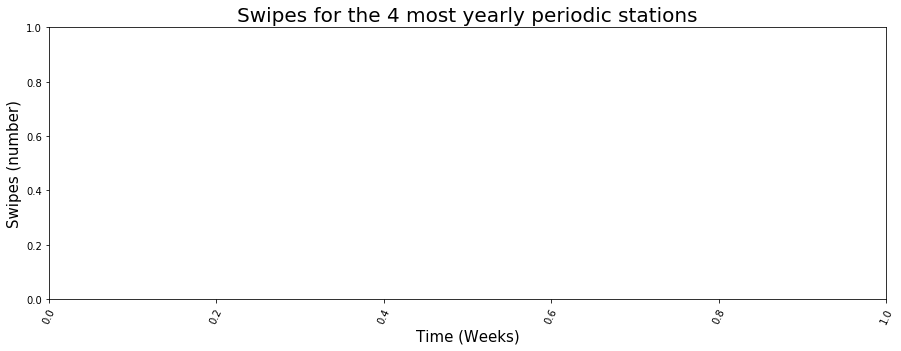

In [77]:
# Plotting the station swipes and dates to try to find possible events that explain the preiodicity

fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
pl.xlabel("Time (Weeks)", fontsize=15)
pl.ylabel("Swipes (number)", fontsize=15)
ax.legend(loc='best', fontsize=12)
pl.title("Swipes for the 4 most yearly periodic stations", fontsize=20)
pl.xticks(rotation='65')

for i in range(len(most_yearly_periodic_stations)):
    ax.plot(rng, mtarides_allStations[most_yearly_periodic_stations[i]], 
            '-', label="Station " + str(most_yearly_periodic_stations[i]))
    
# Shrink current axis by 20%
# So I can put a legend to the right of the current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

NameError: name 'mtarides_allStations' is not defined

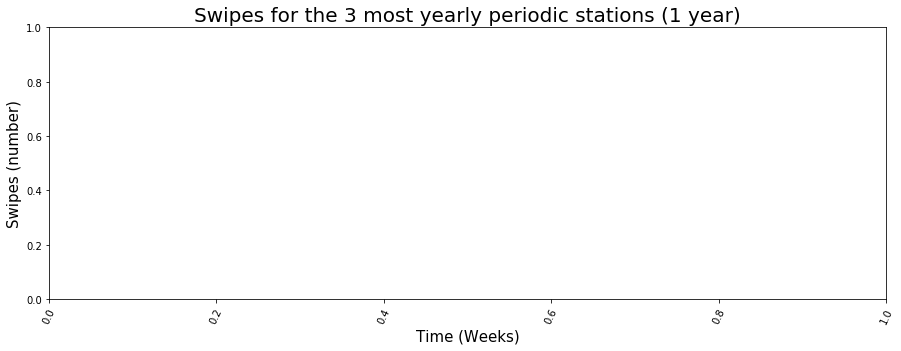

In [78]:
# Plotting the station swipes and dates to try to find possible events that explain the preiodicity

fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
pl.xlabel("Time (Weeks)", fontsize=15)
pl.ylabel("Swipes (number)", fontsize=15)
ax.legend(loc='best', fontsize=12)
pl.title("Swipes for the 3 most yearly periodic stations (1 year)", fontsize=20)
pl.xticks(rotation='65')

# Remember the array with the top 5 periodic
# [0, 194, 150, 327, 32]

ax.plot(rng[30:84], mtarides_allStations[most_yearly_periodic_stations[1]][30:84], 
            '-', label="Station " + str(most_yearly_periodic_stations[1]))
ax.plot(rng[30:84], mtarides_allStations[most_yearly_periodic_stations[2]][30:84], 
            '-', label="Station " + str(most_yearly_periodic_stations[2]))
ax.plot(rng[30:84], mtarides_allStations[most_yearly_periodic_stations[3]][30:84], 
            '-', label="Station " + str(most_yearly_periodic_stations[3]))
ax.legend(loc='best')